## Capital Asset Pricing Model (CAPM)

### Linear Factor Models

#### Market_Portfolio.xlsx contains monthly nominal (net) returns for the market portfolio, expressed as a percentage. These returns cover the ten-year period from Jan 2004 through Dec 2013. Assume that the risk-free rate is 0.13% per month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Rf = 0.13

In [2]:
industry_portfolio = pd.read_excel("Industry_Portfolios.xlsx", index_col = 0)
market_portfolio = pd.read_excel("Market_Portfolio.xlsx", index_col = 0)

/Users/xiezijun/Documents/anaconda/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
industry_portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [4]:
market_portfolio

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


### Market Model

#### Q1.1 Regress the monthly excess returns for each of the ten industry portfolios on the monthly excess returns for the market portfolio, so as to estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolios.

In [5]:
def regression_model(i):
    intercept = np.empty([i, 1])
    slope = np.empty([i, 1])
    
    for i in range(0,i):
        market_model = LinearRegression().fit(np.array(market_portfolio.iloc[:,0]).reshape(-1,1)-Rf,
                                              industry_portfolio.iloc[:,i]-Rf)
        intercept[i] = market_model.intercept_
        slope[i] = market_model.coef_
#         Another method:
#         result = sm.OLS(industry_portfolio.iloc[:,i]-Rf, sm.add_constant(market_portfolio-Rf)).fit()
#         intercept[i] = result.params[0]
#         slope[i] = result.params[1]
    
    return intercept, slope

#### Q1.2 Create a table showing the intercept and slope coefficients for the ten industry portfolios.

In [6]:
Market_Model_Table = pd.DataFrame(industry_portfolio.reset_index().keys()[1:], columns = ["industries"])
Market_Model_Table["intercept"] = regression_model(10)[0]
Market_Model_Table["slope"] = regression_model(10)[1]
Market_Model_Table

,industries,intercept,slope
0,NoDur,0.369443,0.652647
1,Durbl,-0.415599,1.648536
2,Manuf,0.159771,1.169846
3,Enrgy,0.501719,0.969850
4,HiTec,-0.064020,1.132969
5,Telcm,0.194691,0.900729
6,Shops,0.275492,0.826492
7,Hlth,0.237841,0.673036
8,Utils,0.444585,0.538086
9,Other,-0.387135,1.207309


#### Q1.3 Briefly explain the economic significance of the intercept and slope coefficients.

> The intercept and slope coefficients work together to tell us which relationships in your model are statistically significant and the nature of those relationships. 

> The slope coefficients describe the mathematical relationship between each independent variable and the dependent variable. Here we wish to explore the how the market risk will impact the ten industries, the result show all the industries has the positive relationship with market portfolio.

> The intercept (often labeled the constant) is the expected mean value of Y when all X=0.

* Intercept coefficient from market model regression represents CAPM pricing error.

* Slope coefficient from market model regression represents amount of exposure to market risk.

### Security Market Line (SML)

#### Q2.1 Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

In [7]:
Ri = industry_portfolio.mean()
Rm = market_portfolio.mean()

In [8]:
R = pd.concat([pd.DataFrame(Ri),pd.DataFrame(Rm)])
R

,0
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


#### Q2.2 Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β (by construction, the market portfolio has β of one). This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)

In [9]:
Beta = pd.concat([Market_Model_Table[["slope"]],
                  pd.DataFrame({"slope": 1},index=[10])]).reset_index(drop=True)
SML_model = LinearRegression().fit(Beta, R)

In [10]:
SML_model.score(Beta, R)

0.09709883406266284

In [11]:
print("the intercept for the SML:", SML_model.intercept_[0])
print("the slope coefficients for the SML:", SML_model.coef_[0][0])

the intercept for the SML: 1.032768368265706
the slope coefficients for the SML: -0.18546745836573278


#### Q2.3 Using the estimated intercept and slope coefficients for the SML, plot the SML in the range of β from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)

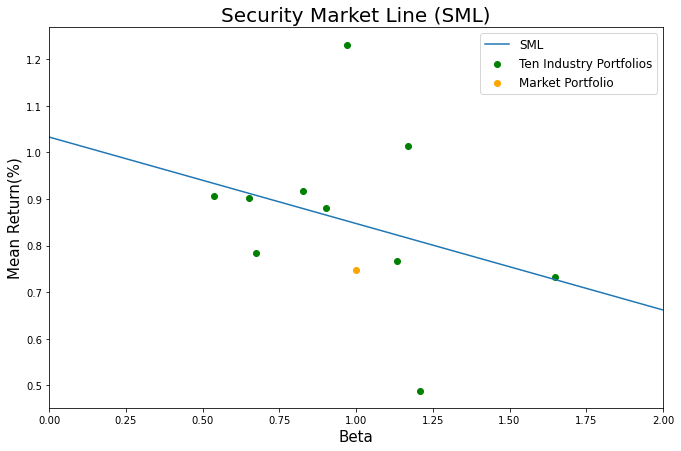

In [12]:
def R_variable(beta):
    return SML_model.intercept_[0] + beta * SML_model.coef_[0][0]

plt.figure(figsize = (11,7))
beta = np.linspace(0,2,100)
plt.plot(beta, R_variable(beta), label = "SML")
plt.scatter(Beta.iloc[:10], R.iloc[:10], color = "green", label = "Ten Industry Portfolios")
plt.scatter(Beta.iloc[-1], R.iloc[-1], color = "orange", label = "Market Portfolio")
plt.xlabel("Beta", fontsize = 15)
plt.xlim(0,2)
plt.ylabel("Mean Return(%)", fontsize = 15)
plt.legend(fontsize = 12)
plt.title("Security Market Line (SML)", fontsize = 20)
plt.show()

#### Q2.4 Briefly explain the economic significance of the SML.

> The SML is useful in determining whether the security offers a favorable expected return compared to its level of risk. 

> The classical theory of SML assumes that it is a straight line with positive slope coefficients, which means that an investor is willing to accept lower return on the lower beta assets than on the higher beta assets. Differences in expected returns are compensations for different degrees of systematic risk (i.e.,
market beta). But this SML shows the difference.

> The downward-sloping SML cannot be easily explained by existing theories of the low-beta anomaly that generally resorts to certain type of market constraints. Investors' overconfidence offers some promises in reconciling the downward-sloping SML. Sometimes high-beta stocks are the most heavily traded stocks with the lowest risk-adjust returns.

> A downward-sloping SML also has its distinctive portfolio implications for the mutual fund industry. In fact, the evidence from the actively managed equity funds in China reinforces the view that in a retail-investor-dominated market, some institutional investors (i.e., mutual funds) actively exploit the portfolio implications of the low-beta anomaly by shying away from lottery-like stocks and betting on low-beta stocks for superior performance.

* SML shows that all appropriately-priced assets should have same Treynor ratio. Assets that lie above SML are underpriced, while assets that lie below SML are overpriced.